# Introduction

Context

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is.

kaggle datasets download -d iabhishekofficial/mobile-price-classification

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd gdrive/MyDrive/Colab Notebooks
!ls


[Errno 2] No such file or directory: 'gdrive/MyDrive/Colab Notebooks'
/content/gdrive/MyDrive/Colab Notebooks
 abalone.data.txt
 None
'None (1)'
 test.csv
 train.csv
 Untitled0.ipynb
'Копия блокнота "itmo_course_base_models.ipynb"'
'Копия блокнота "itmo_course_eda.ipynb"'
'Копия блокнота "itmo_course_feature_engineering.ipynb"'
'Копия блокнота "itmo_course_jupyter.ipynb"'
'Копия блокнота "itmo_course_metrics.ipynb"'
'Копия блокнота "itmo_course_ml_categorical_encoding.ipynb"'
'Копия блокнота "itmo_course_numpy_pandas.ipynb"'


In [ ]:
train_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/train.csv')

**Classification task:** #price_range is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [ ]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**Some comments on labels:** \
battery_powerTotal -- energy a battery can store in one time measured in mAh;\
blue -- Has bluetooth or not;\
clock_speed -- speed at which microprocessor executes instructions ;\
fc -- Front Camera mega pixels;\
int_memory -- Internal Memory in Gigabytes;\
m_dep -- Mobile Depth in cm;\
mobile_wt -- Weight of mobile phone (in gramms suppose);\
pc -- Primary Camera mega pixels;\
px_height(width) -- Pixel Resolution Height (width);


In [ ]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
train_data.shape

(2000, 21)

In [ ]:
train_data.dtypes # therefore numbers only

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

There are binary properties such as four_g, three_g, wifi, touch_screen,dual_sim. I wunder whether the three_g, wifi and touch_screen are crusial.

In [ ]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Since mean values are not eq. to 1 or about, the properties matter.

In [ ]:
#num_cols.columns[2:]

In [ ]:
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
#count = 0
#for idx, feature in enumerate(train_data.columns[1:]):
 #   sns.boxplot(x=train_data[feature], ax=axes[count % 3, count // 3])
 #   count += 1

<ipython-input-41-36b8fc3c1900>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['battery_power'], bins=50, color='r', ax=axes[0, 0])
<ipython-input-41-36b8fc3c1900>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['clock_speed'], bins=50, color='g', ax=axes[0, 1])
<ipython

<Axes: xlabel='price_range', ylabel='Density'>

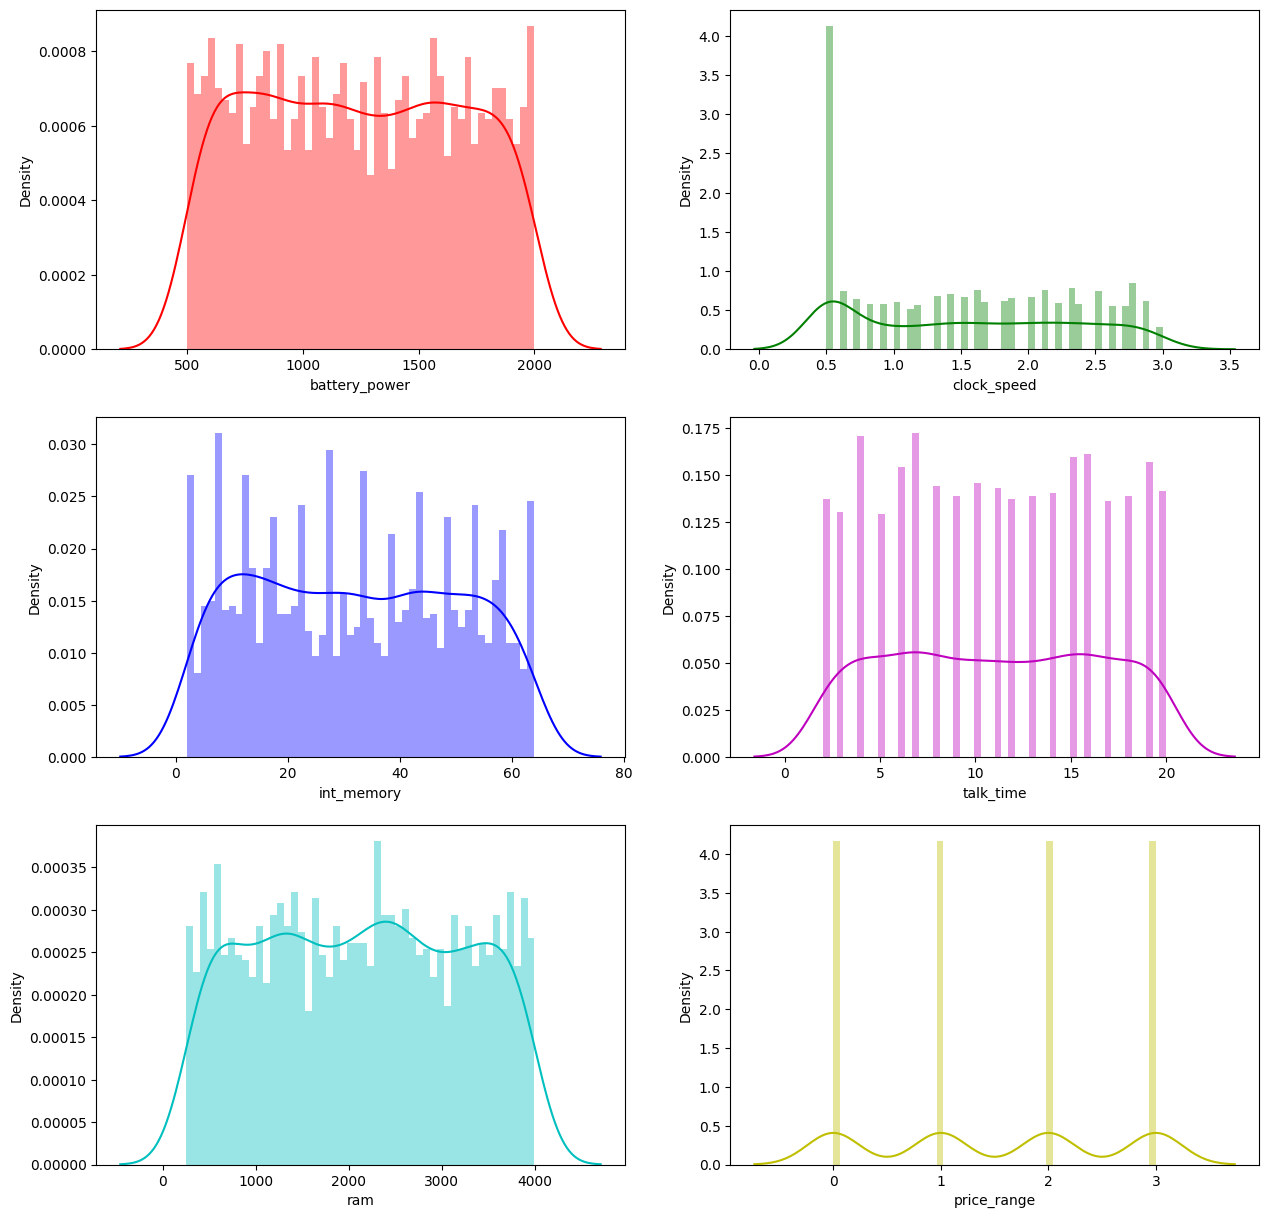

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.distplot(train_data['battery_power'], bins=50, color='r', ax=axes[0, 0])
sns.distplot(train_data['clock_speed'], bins=50, color='g', ax=axes[0, 1])
sns.distplot(train_data['int_memory'], bins=50, color='b', ax=axes[1, 0])
sns.distplot(train_data['talk_time'].dropna(), bins=50, color='m', ax=axes[1, 1])
sns.distplot(train_data['ram'], bins=50, color='c', ax=axes[2, 0])
sns.distplot(train_data['price_range'], bins=50, color='y', ax=axes[2, 1])

All properties are distributed more or less uniformly including price_range, unless the clock_speed (there are many items with the lowest value).

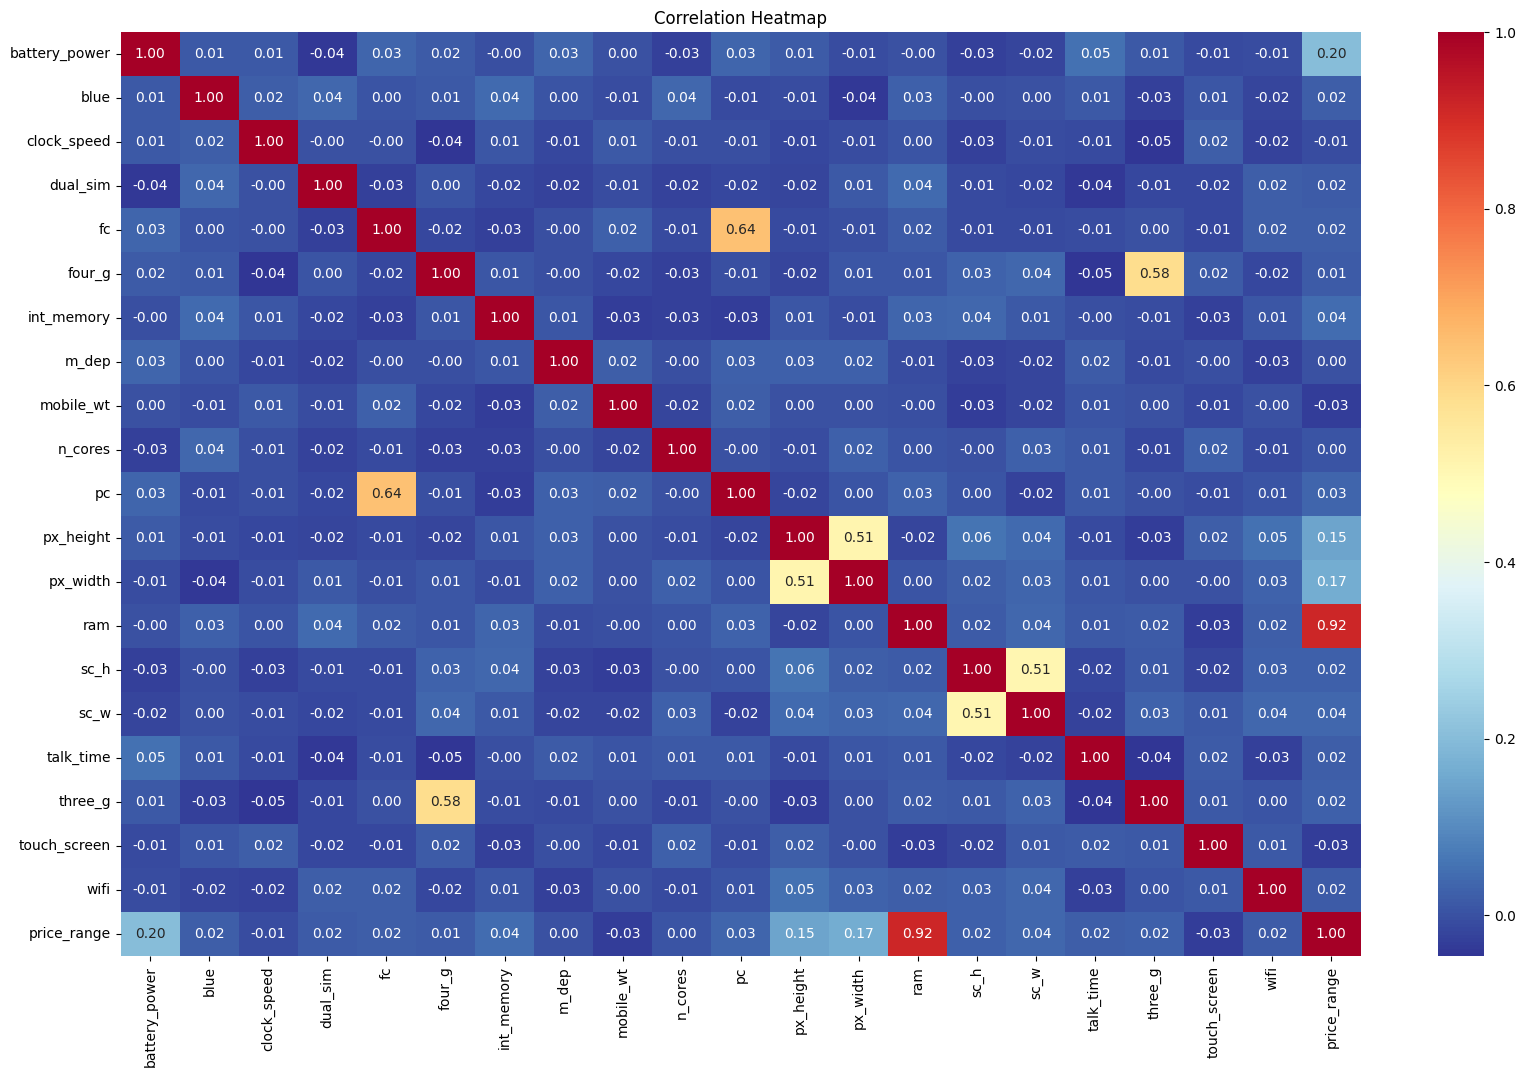

In [ ]:
correlation_matrix = train_data.corr()

# Heatmap chart
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

One can observe extremely large correlation between the target property and ram (0.92), some correlation with battery_power (0.2), pixel resolutions px_height (0.15) and px_width (0.17).

A few negative correlations with the target have been detected. Mobile_wt (weight) and touch_screen are the strongest ones (-0.03).

Regardless price_range, the largest positive correlation appears between fc and pc, negative -- four_g and talk_time (surprisingly).

# Metrics

First i will train and examine the model on train_data, then run the test. For train_data i choose Accuracy as the basic metrics to compare with known distribution of the target variable. In addition, the f-metrics, will be calculated via logic regression in multiclass 'ovr' regime.

# Baseline model

I wish to examine my model before testing and check accuracy. In order to avoid an overtraining, I split train_data into two pieces.\
=> **Cross-validation**

In [ ]:
!pip install -U scikit-learn > None # Restart environment after

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

##Split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    train_data.drop(columns='price_range'),
    train_data['price_range'],
    random_state=2023,
    test_size=0.3
)
#print(y_val)
#print(X_val)

## Scale

In [ ]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)
X_val_scaled = pd.DataFrame(
    # на момент записи лекции здесь была строчка fit_transform,
    # что неверно, так как мы всегда обучаем scaler и тому подобные объекты
    # только на train, а затем уже применяем к test части данных метод transform!
    scaler.transform(X_val),
    columns=X_val.columns
)
#print(X_val_scaled)

## Logistic Regression

In [ ]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(X_train, y_train)
y_preds_lr = lr.predict(X_val)
print(classification_report(y_val, y_preds_lr))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       149
           1       0.62      0.60      0.61       129
           2       0.67      0.43      0.52       160
           3       0.70      0.90      0.79       162

    accuracy                           0.71       600
   macro avg       0.71      0.71      0.70       600
weighted avg       0.71      0.71      0.70       600



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Comparison with scaled input data. Accurancy, F1-score, Recall and Precision has encreased.

In [ ]:
lrm = LogisticRegression(multi_class='ovr')
lrm.fit(X_train_scaled, y_train)
y_preds_lrm = lrm.predict(X_val_scaled)
print(classification_report(y_val, y_preds_lrm))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       149
           1       0.75      0.74      0.74       129
           2       0.81      0.68      0.74       160
           3       0.89      0.99      0.94       162

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



In [ ]:
#!pip3 install --upgrade pandas

In [ ]:
def plotCoefficients(model, columns,num):
    #print(model.coef_[num])
    #coefs = pd.DataFrame(data= model.coef_[num], index=None,columns=columns)
    coefs = model.coef_[num]
    #print(coefs)
    #coefs.columns = ["coef"]
    #coefs["abs"] = coefs.coef.apply(np.abs)
    #coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)

    plt.figure(figsize=(25, 7))
    plt.bar(columns,coefs)
    plt.grid(True, axis='y')
    plt.title('Class %i' %num)
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed')

In [ ]:
lrm.coef_.shape

(4, 20)

In [ ]:
#print(lrm.coef_[0])

In [ ]:
#print(X_train_scaled)

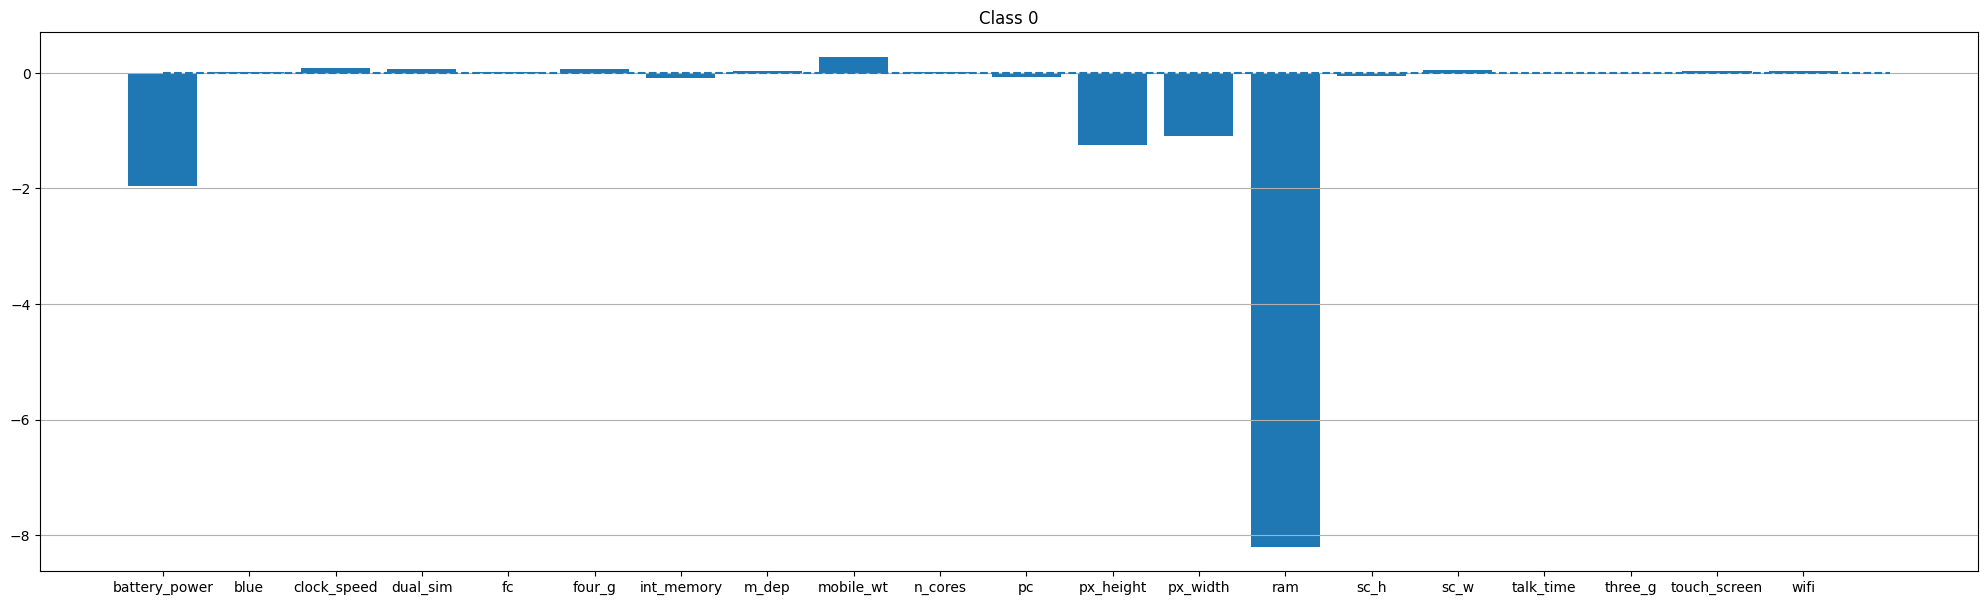

In [ ]:
plotCoefficients(lrm, X_train_scaled.columns,0)

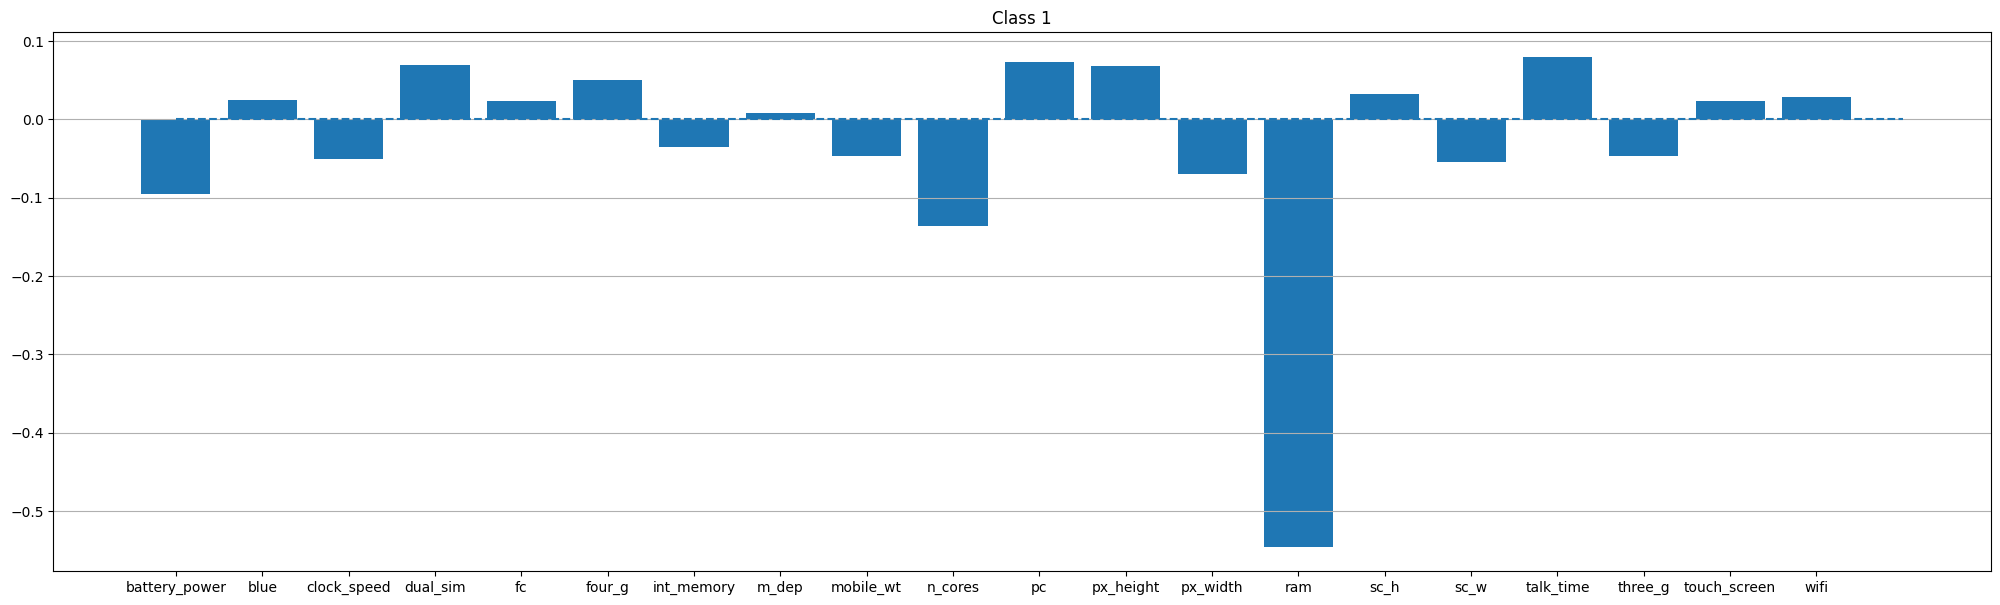

In [ ]:
plotCoefficients(lrm, X_train_scaled.columns,1)

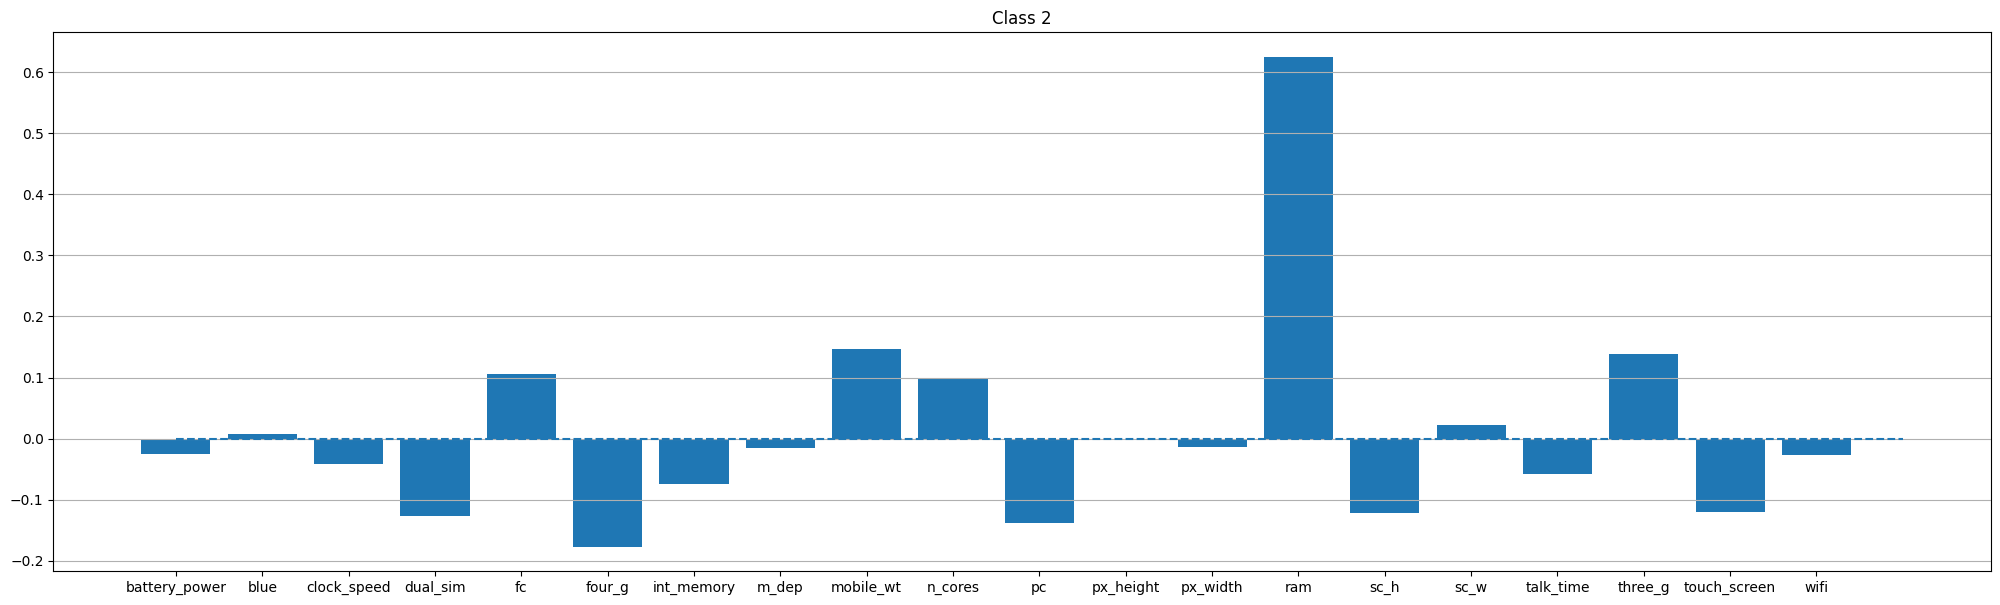

In [ ]:
plotCoefficients(lrm, X_train_scaled.columns,2)

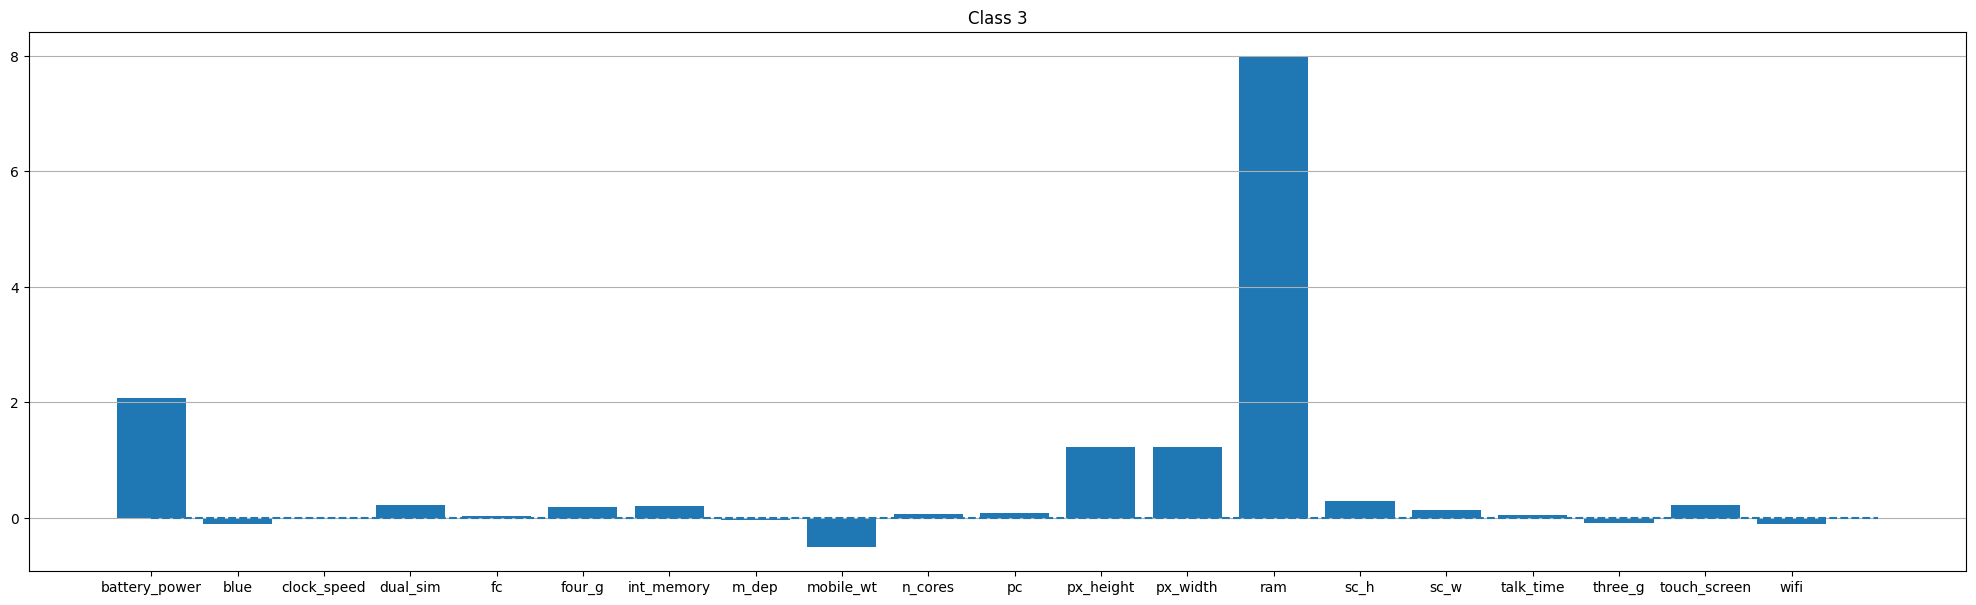

In [ ]:
plotCoefficients(lrm, X_train_scaled.columns,3)

### Ruduction of input data

Let's reduce number of features in order to increase quality of prediction especially for class 1 and class 2. We keep only four features: battery_power, px_height, px_width, ram as matrix of correlation shows.

In [ ]:
#cols_to_drop =['battery_power']
cut_train_sc = X_train_scaled[["battery_power","px_height","px_width","ram"]]
cut_val_sc = X_val_scaled[["battery_power","px_height","px_width","ram"]]
cut_train_sc.head

<bound method NDFrame.head of       battery_power  px_height  px_width       ram
0         -1.276456  -0.069970  0.846879  0.163361
1         -1.573645   2.724386  1.442501 -1.008643
2         -0.830673   0.108393  1.007417  1.603464
3         -0.245440  -0.717108 -1.077260  1.106363
4          1.439391   0.821846  0.932965 -0.963959
...             ...        ...       ...       ...
1395      -1.148437   0.044365 -1.261065  1.444280
1396      -1.530210  -1.291071  0.172150  0.060031
1397      -0.679793   1.215159 -0.067494  1.596017
1398      -0.350599   1.013929  1.081870  0.235040
1399      -0.368888   0.798979  0.574661 -0.620457

[1400 rows x 4 columns]>

In [ ]:
lrm = LogisticRegression(multi_class='ovr')
lrm.fit(cut_train_sc, y_train)
y_preds_lrm = lrm.predict(cut_val_sc)
print(classification_report(y_val, y_preds_lrm))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       149
           1       0.83      0.85      0.84       129
           2       0.91      0.71      0.80       160
           3       0.87      1.00      0.93       162

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



We did not loose in f1-score for class 0 and class 3, but increase it for other classes.

### Dummy model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(cut_train_sc, y_train);

In [ ]:
y_pred_dummy = dummy_clf.predict(cut_val_sc)
accuracy_score(y_val, y_pred_dummy)

0.215

In [ ]:
accuracy_score(y_val, y_preds_lrm)

0.89